## 컬럼들의 의미
- Row ID : 데이터 순서
- Order ID : 주문 번호
- Order Date : 주문 날짜
- Ship Date : 배송 날짜
- Ship Mode : 배송 모드 
- Customer ID : 고객 ID
- Customer Name : 고객명
- Segment : 고객 상태 (고객, 회사, 재택근무사무실)
- Country : 나라
- City : 도시 
- State : 주 
- Postal Code : 우편번호
- Region : 동서남북
- Product ID : 제품 ID
- Category : 상품 분류 
- Sub-Categroy : 상품 소분류
- Procuct Name : 상품명
- Sales : 매상
- Quantity : 수량
- Discount : 할인
- Profit : 이윤

In [114]:
# module import
# %load my__init.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import NaN as NA
import re
import seaborn as sns
from operator import itemgetter, attrgetter

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 원본 dataframe 읽기
df = pd.read_excel("Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
# 2014 ~ 2017 년 데이터
df.sort_values(by='Order Date')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
908,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188


In [4]:
df2 = pd.DataFrame(df.groupby('Order Date').count()['Row ID'])
df2['매출'] = df.groupby('Order Date').sum()['Sales']
df2.columns = ['구매건수','매출']
df2

,구매건수,매출
Order Date,,
2014-01-03,1,16.4480
2014-01-04,3,288.0600
2014-01-05,1,19.5360
2014-01-06,9,4407.1000
2014-01-07,2,87.1580
...,...,...
2017-12-26,4,814.5940
2017-12-27,2,177.6360
2017-12-28,19,1657.3508


In [5]:
df2.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

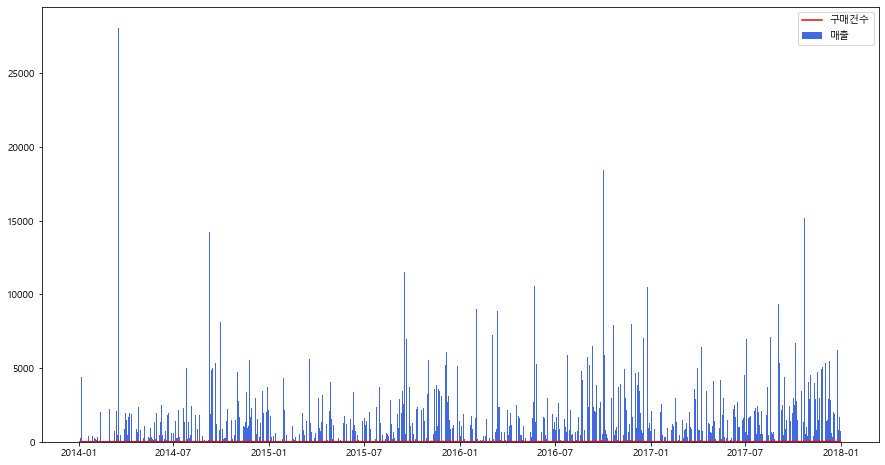

In [6]:
plt.rcParams["figure.figsize"] = (15,8)
p1 = plt.bar(df2.index, df2['매출'], color='royalblue',label='매출')
p2 = plt.plot(df2.index, df2['구매건수'],color='red',label='구매건수')
plt.legend()
plt.show()

In [7]:
g = df2.groupby(pd.Grouper( freq='M'))
dfs = [group for _,group in g]
dfs

[            구매건수        매출
 Order Date                
 2014-01-03     1    16.448
 2014-01-04     3   288.060
 2014-01-05     1    19.536
 2014-01-06     9  4407.100
 2014-01-07     2    87.158
 2014-01-09     2    40.544
 2014-01-10     2    54.830
 2014-01-11     1     9.940
 2014-01-13    11  3553.795
 2014-01-14     1    61.960
 2014-01-15     1   149.950
 2014-01-16     4   299.964
 2014-01-18     1    64.864
 2014-01-19     4   378.594
 2014-01-20    17  2673.870
 2014-01-21     1    25.248
 2014-01-23     2    46.020
 2014-01-26     9  1097.250
 2014-01-27     3   426.670
 2014-01-28     1     3.928
 2014-01-30     2   240.500
 2014-01-31     1   290.666,
             구매건수        매출
 Order Date                
 2014-02-01     1   468.900
 2014-02-02     3   211.646
 2014-02-03     2    97.112
 2014-02-04     3   134.384
 2014-02-06     4   330.512
 2014-02-07     2   180.320
 2014-02-08     1    14.560
 2014-02-11     9  2043.400
 2014-02-12     1   129.568
 2014-02-14     4  

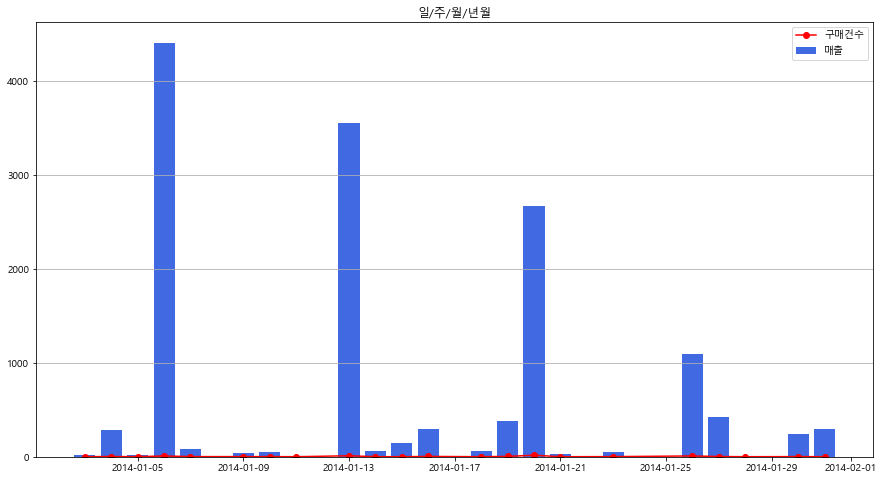

In [8]:
plt.rcParams["figure.figsize"] = (15,8)

p1 = plt.bar(dfs[0].index, dfs[0]['매출'], color='royalblue',label='매출')
p2 = plt.plot(dfs[0].index, dfs[0]['구매건수'],color='red',label='구매건수', marker='o')

plt.grid(True, axis='y')
plt.title('일/주/월/년월')
plt.legend()
plt.show()

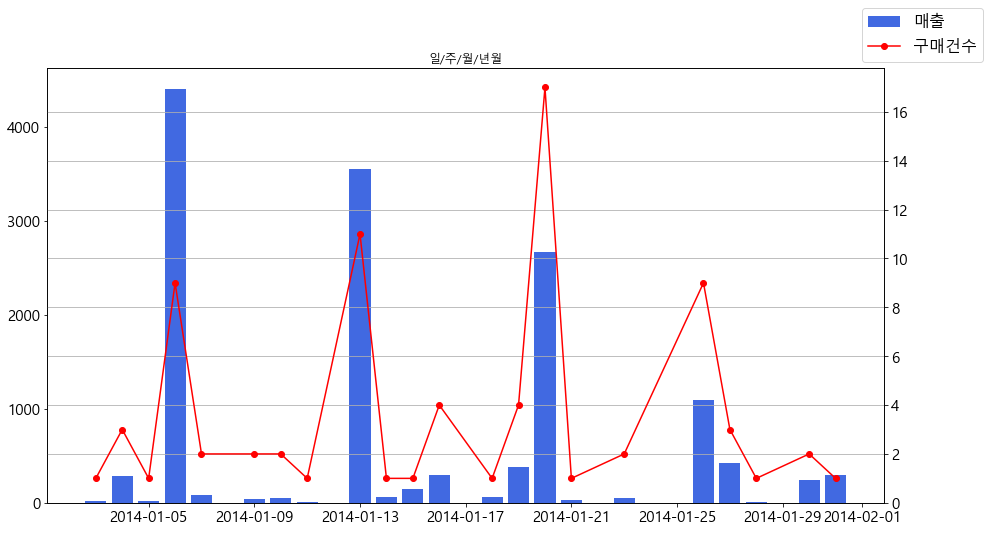

In [9]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots(1,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax1.bar(dfs[0].index, dfs[0]['매출'], color='royalblue',label='매출')
ax2 = ax1.twinx()
plt.yticks(fontsize=15)
ax2.plot(dfs[0].index, dfs[0]['구매건수'],color='red',label='구매건수', marker='o')
ax2.set_yticks([i*2 for i in range(9)])

plt.rc('legend', fontsize=16)
plt.grid(True, axis='y')
plt.title('일/주/월/년월')
fig.legend()
plt.show()

In [10]:
df3 = df2.resample('M').sum()

In [11]:
g3 = df3.groupby(pd.Grouper( freq='Y'))
dfs3 = [group for _,group in g3]
dfs3

[            구매건수          매출
 Order Date                  
 2014-01-31    79  14236.8950
 2014-02-28    46   4519.8920
 2014-03-31   157  55691.0090
 2014-04-30   135  28295.3450
 2014-05-31   122  23648.2870
 2014-06-30   135  34595.1276
 2014-07-31   143  33946.3930
 2014-08-31   153  27909.4685
 2014-09-30   268  81777.3508
 2014-10-31   159  31453.3930
 2014-11-30   318  78628.7167
 2014-12-31   278  69545.6205,
             구매건수          매출
 Order Date                  
 2015-01-31    58  18174.0756
 2015-02-28    64  11951.4110
 2015-03-31   138  38726.2520
 2015-04-30   160  34195.2085
 2015-05-31   146  30131.6865
 2015-06-30   138  24797.2920
 2015-07-31   140  28765.3250
 2015-08-31   159  36898.3322
 2015-09-30   293  64595.9180
 2015-10-31   166  31404.9235
 2015-11-30   324  75972.5635
 2015-12-31   316  74919.5212,
             구매건수          매출
 Order Date                  
 2016-01-31    89  18542.4910
 2016-02-29    83  22978.8150
 2016-03-31   163  51715.8750
 2016-04

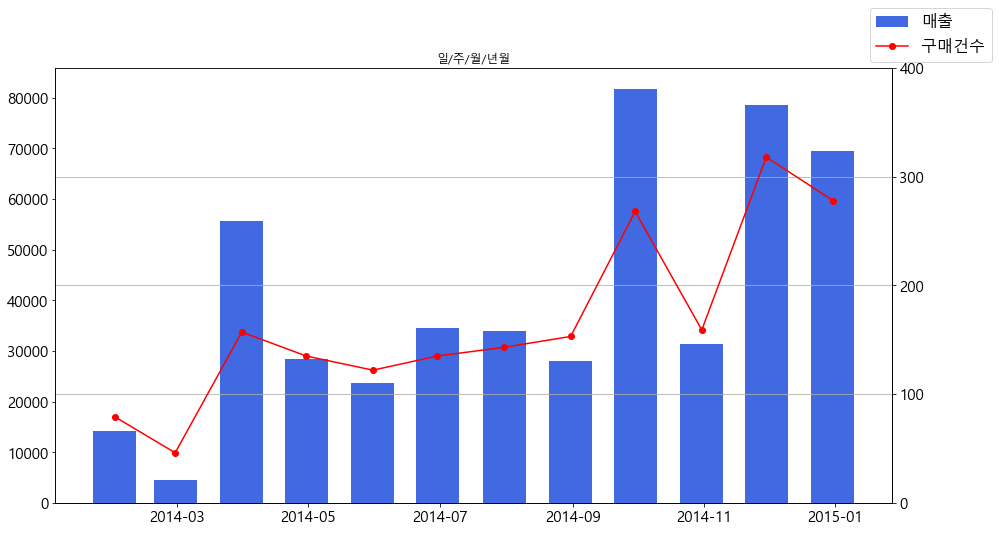

In [12]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots(1,1)
plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

ax1.bar(dfs3[0].index, dfs3[0]['매출'], color='royalblue',label='매출', width=20)
ax1.tick_params(axis = 'y', labelsize =15)
ax2 = ax1.twinx()
# plt.yticks(fontsize=15)
ax2.plot(dfs3[0].index, dfs3[0]['구매건수'],color='red',label='구매건수', marker='o')
ax2.set_yticks([i*100 for i in range(5)])
ax2.tick_params(axis = 'y', labelsize =15)


plt.rc('legend', fontsize=16)
plt.grid(True, axis='y')
plt.title('일/주/월/년월')
fig.legend()
plt.show()

In [13]:
df_user = pd.DataFrame(df.groupby(['Customer ID']).count()['Sales'])
df_user['매출'] = df.groupby(['Customer ID']).sum()['Sales']
df_user.columns = ['유저별 총 구매횟수','매출']
# df_user2 = df_user.droplevel(0, axis=0)
df_user

,유저별 총 구매횟수,매출
Customer ID,,
AA-10315,11,5563.560
AA-10375,15,1056.390
AA-10480,12,1790.512
AA-10645,18,5086.935
AB-10015,6,886.156
...,...,...
XP-21865,28,2374.658
YC-21895,8,5454.350
YS-21880,12,6720.444


In [14]:
df_user3 = df[['Order Date', 'Customer ID']]
df_user3
# df.merge(df_user2['유저별 총 구매횟수'], )
# df_user3.merge(df_user2 , left_on=df_user3.index)

,Order Date,Customer ID
0,2016-11-08,CG-12520
1,2016-11-08,CG-12520
2,2016-06-12,DV-13045
3,2015-10-11,SO-20335
4,2015-10-11,SO-20335
...,...,...
9989,2014-01-21,TB-21400
9990,2017-02-26,DB-13060
9991,2017-02-26,DB-13060
9992,2017-02-26,DB-13060


In [15]:
df_user_final = pd.merge(df,df_user, on=['Customer ID'])
df_user_final.drop(['매출'],axis=1,inplace=True)
df_user_final['주문년도/월'] = df_user_final['Order Date'].dt.strftime('%Y-%m')
df_user_final

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,유저별 총 구매횟수,주문년도/월
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,5,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,5,2016-11
2,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160,5,2017-01
3,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476,5,2015-10
4,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,OFF-PA-10003001,Office Supplies,Paper,Xerox 1986,5.344,1,0.2,1.8704,5,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9560,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,195.640,5,0.2,-44.0190,6,2016-05
9990,9561,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,FUR-FU-10001876,Furniture,Furnishings,"Computer Room Manger, 14""",51.968,2,0.2,10.3936,6,2016-05
9991,9562,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,TEC-AC-10002637,Technology,Accessories,Logitech VX Revolution Cordless Laser Mouse fo...,431.976,3,0.2,-75.5958,6,2016-05
9992,9563,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal,224.937,3,0.7,-164.9538,6,2016-05


In [16]:
df_user_final[df_user_final['유저별 총 구매횟수']==37]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,유저별 총 구매횟수,주문년도/월
7762,2134,CA-2015-122210,2015-11-30,2015-12-04,Standard Class,WB-21850,William Brown,Consumer,United States,Philadelphia,...,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,152.991,3,0.7,-122.3928,37,2015-11
7763,2135,CA-2015-122210,2015-11-30,2015-12-04,Standard Class,WB-21850,William Brown,Consumer,United States,Philadelphia,...,OFF-FA-10000053,Office Supplies,Fasteners,Revere Boxed Rubber Bands by Revere,10.584,7,0.2,-2.3814,37,2015-11
7764,2136,CA-2015-122210,2015-11-30,2015-12-04,Standard Class,WB-21850,William Brown,Consumer,United States,Philadelphia,...,TEC-PH-10002807,Technology,Phones,Motorla HX550 Universal Bluetooth Headset,94.920,4,0.4,15.8200,37,2015-11
7765,2149,CA-2014-141607,2014-12-12,2014-12-17,Standard Class,WB-21850,William Brown,Consumer,United States,Concord,...,FUR-FU-10003975,Furniture,Furnishings,Eldon Advantage Chair Mats for Low to Medium P...,43.310,1,0.0,4.3310,37,2014-12
7766,3742,CA-2016-137848,2016-01-15,2016-01-21,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,OFF-EN-10001137,Office Supplies,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",16.520,4,0.0,7.5992,37,2016-01
7767,3743,CA-2016-137848,2016-01-15,2016-01-21,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,OFF-PA-10004285,Office Supplies,Paper,Xerox 1959,60.120,9,0.0,28.8576,37,2016-01
7768,3744,CA-2016-137848,2016-01-15,2016-01-21,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,OFF-BI-10002225,Office Supplies,Binders,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",49.536,3,0.2,17.3376,37,2016-01
7769,4227,CA-2017-120327,2017-11-11,2017-11-16,Standard Class,WB-21850,William Brown,Consumer,United States,Urbandale,...,OFF-FA-10004854,Office Supplies,Fasteners,Vinyl Coated Wire Paper Clips in Organizer Box...,45.920,4,0.0,21.5824,37,2017-11
7770,4309,CA-2014-125829,2014-11-04,2014-11-11,Standard Class,WB-21850,William Brown,Consumer,United States,Los Angeles,...,TEC-PH-10001079,Technology,Phones,Polycom SoundPoint Pro SE-225 Corded phone,666.344,7,0.2,66.6344,37,2014-11
7771,4310,CA-2014-125829,2014-11-04,2014-11-11,Standard Class,WB-21850,William Brown,Consumer,United States,Los Angeles,...,FUR-TA-10002041,Furniture,Tables,"Bevis Round Conference Table Top, X-Base",573.728,4,0.2,-64.5444,37,2014-11


In [17]:
dff = pd.DataFrame(df_user_final.groupby(['주문년도/월','유저별 총 구매횟수']).sum()['Sales'])
dff2 = dff.unstack().T
dff2

주문년도/월             2014-01   2014-02    2014-03   2014-04   2014-05  \
      유저별 총 구매횟수                                                      
Sales 1                NaN       NaN        NaN       NaN       NaN   
      2                NaN       NaN        NaN       NaN       NaN   
      3                NaN       NaN        NaN    68.692  3348.520   
      4             44.008       NaN   1678.090       NaN    46.800   
      5             40.544       NaN     10.500   293.478       NaN   
      6             19.440    12.624    369.832    59.920   184.280   
      7                NaN   291.492    139.940       NaN  1171.775   
      8            663.778   321.560   1895.715  1985.981   322.400   
      9            355.530    17.248    749.129  2334.848   134.184   
      10           522.196   477.940   1163.490   286.034   997.472   
      11          2099.900       NaN   1953.060  4509.672  4263.475   
      12           445.788    29.136   2296.561  1132.618  1156.615   
      13            18.720   117.136   5252.680   384.200  2874.314   
      14               NaN  1720.680    995.242  2150.202  1242.428   
      15            93.490    12.350  35475.866  1705.152   765.494   
      16            40.846       NaN      7.980       NaN   245.860   
      17           341.660   160.272    648.352   799.910   535.482   
      18           545.940    19.456    590.762  2440.610  2621.656   
      19               NaN     8.850    521.870  2689.098   855.344   
      20          1679.749   560.550    574.194   371.556   576.234   
      21           944.610    40.800        NaN  2015.910   460.850   
      22          4374.880   664.838    221.218       NaN       NaN   
      23               NaN       NaN    583.358   844.986  1213.494   
      24               NaN       NaN        NaN   592.568       NaN   
      25               NaN       NaN        NaN    32.400   116.280   
      26               NaN       NaN     13.456   661.504   235.770   
      27               NaN       NaN     60.080     7.830       NaN   
      28          1995.876    64.960    404.550   743.762       NaN   
      29               NaN       NaN        NaN       NaN   279.560   
      30               NaN       NaN        NaN       NaN       NaN   
      31               NaN       NaN        NaN       NaN       NaN   
      32             9.940       NaN     85.084  1860.956       NaN   
      34               NaN       NaN        NaN   323.458       NaN   
      37               NaN       NaN        NaN       NaN       NaN   

주문년도/월              2014-06   2014-07    2014-08     2014-09   2014-10  ...  \
      유저별 총 구매횟수                                                        ...   
Sales 1                 NaN       NaN        NaN         NaN       NaN  ...   
      2                 NaN       NaN        NaN    143.9520   129.920  ...   
      3                 NaN       NaN        NaN     60.5100       NaN  ...   
      4            334.6800       NaN    19.4400         NaN     4.710  ...   
      5                 NaN   706.064        NaN    709.5380   539.800  ...   
      6           1158.4480  1398.956   544.6520    794.7840   431.358  ...   
      7           1751.8880  1491.392   622.4200   5228.4760   540.704  ...   
      8            809.2280   276.280   423.5060    190.9310    54.474  ...   
      9            579.4880   242.368  3150.7565   2656.1910   995.396  ...   
      10          3691.2540  1011.888   947.5220   4197.1400  1091.236  ...   
      11          4727.1280   803.676  1586.3720   1107.8888  2325.898  ...   
      12           147.0480   824.146  2115.0600   1467.1980  1053.534  ...   
      13          1832.1050   908.582   869.8060   2545.7500  4565.068  ...   
      14          1373.4100  1422.346  5204.7060   7454.0820  1023.294  ...   
      15          4526.8320  1783.900  2434.0520   4292.2780  2721.978  ...   
      16             6.0800  2984.056  4481.7020  10949.4400  2769.463  ...   
      17          299

In [19]:
dff2 = dff2.fillna(0)

In [64]:
dff2014

주문년도/월             2014-01   2014-02    2014-03   2014-04   2014-05  \
      유저별 총 구매횟수                                                      
Sales 1              0.000     0.000      0.000     0.000     0.000   
      2              0.000     0.000      0.000     0.000     0.000   
      3              0.000     0.000      0.000    68.692  3348.520   
      4             44.008     0.000   1678.090     0.000    46.800   
      5             40.544     0.000     10.500   293.478     0.000   
      6             19.440    12.624    369.832    59.920   184.280   
      7              0.000   291.492    139.940     0.000  1171.775   
      8            663.778   321.560   1895.715  1985.981   322.400   
      9            355.530    17.248    749.129  2334.848   134.184   
      10           522.196   477.940   1163.490   286.034   997.472   
      11          2099.900     0.000   1953.060  4509.672  4263.475   
      12           445.788    29.136   2296.561  1132.618  1156.615   
      13            18.720   117.136   5252.680   384.200  2874.314   
      14             0.000  1720.680    995.242  2150.202  1242.428   
      15            93.490    12.350  35475.866  1705.152   765.494   
      16            40.846     0.000      7.980     0.000   245.860   
      17           341.660   160.272    648.352   799.910   535.482   
      18           545.940    19.456    590.762  2440.610  2621.656   
      19             0.000     8.850    521.870  2689.098   855.344   
      20          1679.749   560.550    574.194   371.556   576.234   
      21           944.610    40.800      0.000  2015.910   460.850   
      22          4374.880   664.838    221.218     0.000     0.000   
      23             0.000     0.000    583.358   844.986  1213.494   
      24             0.000     0.000      0.000   592.568     0.000   
      25             0.000     0.000      0.000    32.400   116.280   
      26             0.000     0.000     13.456   661.504   235.770   
      27             0.000     0.000     60.080     7.830     0.000   
      28          1995.876    64.960    404.550   743.762     0.000   
      29             0.000     0.000      0.000     0.000   279.560   
      30             0.000     0.000      0.000     0.000     0.000   
      31             0.000     0.000      0.000     0.000     0.000   
      32             9.940     0.000     85.084  1860.956     0.000   
      34             0.000     0.000      0.000   323.458     0.000   
      37             0.000     0.000      0.000     0.000     0.000   

주문년도/월              2014-06   2014-07    2014-08     2014-09   2014-10  \
      유저별 총 구매횟수                                                         
Sales 1              0.0000     0.000     0.0000      0.0000     0.000   
      2              0.0000     0.000     0.0000    143.9520   129.920   
      3              0.0000     0.000     0.0000     60.5100     0.000   
      4            334.6800     0.000    19.4400      0.0000     4.710   
      5              0.0000   706.064     0.0000    709.5380   539.800   
      6           1158.4480  1398.956   544.6520    794.7840   431.358   
      7           1751.8880  1491.392   622.4200   5228.4760   540.704   
      8            809.2280   276.280   423.5060    190.9310    54.474   
      9            579.4880   242.368  3150.7565   2656.1910   995.396   
      10          3691.2540  1011.888   947.5220   4197.1400  1091.236   
      11          4727.1280   803.676  1586.3720   1107.8888  2325.898   
      12           147.0480   824.146  2115.0600   1467.1980  1053.534   
      13          1832.1050   908.582   869.8060   2545.7500  4565.068   
      14          1373.4100  1422.346  5204.7060   7454.0820  1023.294   
      15          4526.8320  1783.900  2434.0520   4292.2780  2721.978   
      16             6.0800  2984.056  4481.7020  10949.4400  2769.463   
      17          2993.2406   148.264    93.0240   7462.7180    36.360   
      18          2336.9000   990.190

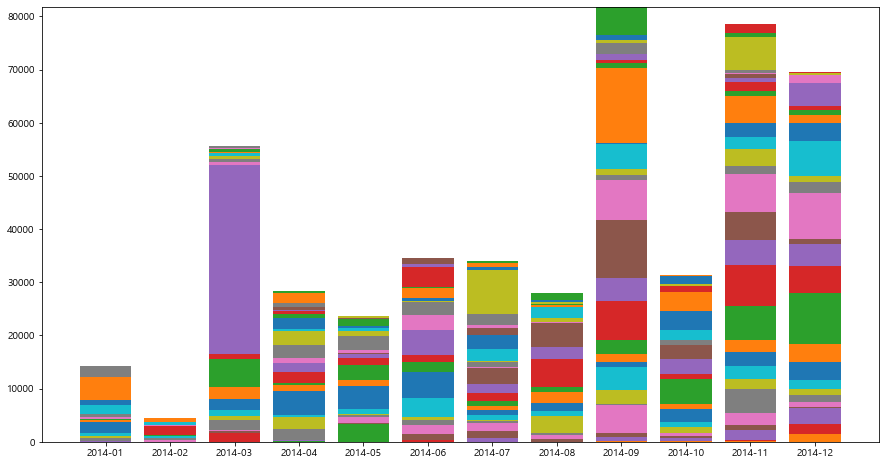

In [69]:
dff2014 = dff2.iloc[:,:12]
fig, ax = plt.subplots()
width=0.35
ax.bar(dff2014.columns, dff2014.iloc[0,:],label='1번 구매자')
for i in range(1,34) :
    ax.bar(dff2014.columns, dff2014.iloc[i,:], bottom=dff2014.iloc[0:i,:].sum(axis=0))

plt.show()

In [21]:
df['랭크'] = df.groupby('Customer ID')['Order Date'].rank(method='first')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,랭크
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,4.0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1.0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1.0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1.0
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,6.0
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.0
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,8.0


In [22]:
df['주문년도/월'] = df['Order Date'].dt.strftime('%Y-%m')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,랭크,주문년도/월
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3.0,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,4.0,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1.0,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1.0,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2.0,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1.0,2014-01
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,6.0,2017-02
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.0,2017-02
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,8.0,2017-02


In [23]:
dff3 = df.groupby(['주문년도/월','랭크']).sum()['Sales'].to_frame().unstack().T
dff3 = dff3.droplevel(0, axis=0)
# dff3 = dff3.fillna(0)
dff3

주문년도/월,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
랭크,,,,,,,,,,,,,,,,,,,,,
1.0,6417.102,1648.776,17903.884,11382.626,11304.759,10468.1530,9647.146,11729.4060,15090.9220,5055.909,...,413.0800,12.3200,NaN,47.9760,222.450,NaN,47.400,1547.8320,164.6880,NaN
2.0,3054.947,1869.254,30145.355,6054.186,5774.704,7979.4240,12716.021,4258.2490,18133.7688,12122.116,...,584.7280,149.2730,65.4240,82.1620,1089.340,256.536,624.840,208.1060,207.7800,90.1760
3.0,916.498,423.942,4886.966,3699.368,3414.312,9058.1730,4020.680,6170.6005,9062.8410,6454.214,...,1801.5880,2682.5150,6.8740,1877.1420,663.870,317.892,1765.334,613.7220,2124.2890,706.1128
4.0,880.188,332.940,1527.532,1946.949,2442.750,2636.3570,1658.540,2459.5070,7965.2690,1586.558,...,1216.7840,1340.1940,859.7360,79.8840,2575.200,463.892,908.812,157.2560,2039.0140,610.4090
5.0,1573.810,60.852,657.392,4553.036,579.596,579.5850,1842.566,1194.9220,3163.6100,1321.626,...,1398.1820,1210.9740,1066.1900,2977.9740,2543.528,374.818,5139.605,1306.4650,10526.0080,1164.6880
6.0,1155.400,184.128,71.622,149.352,97.376,1970.2716,1009.550,318.1380,15194.2530,2287.966,...,452.1340,4883.5085,1333.6610,744.7470,2547.899,769.772,2979.006,3323.8480,4267.7380,2735.8250
7.0,209.250,NaN,498.258,227.976,34.790,938.0640,392.748,1068.3500,3042.4140,539.198,...,3281.7160,690.3540,2640.6970,2703.1510,1805.504,4442.248,5010.004,13975.8160,5526.8408,4208.5680
8.0,29.700,NaN,NaN,10.304,NaN,36.8120,1144.400,454.8760,3222.3750,971.862,...,3250.4580,2677.6240,4592.7510,1727.0180,2431.828,1891.820,6461.460,11013.2740,4734.6620,4063.7260
9.0,NaN,NaN,NaN,154.764,NaN,418.8000,1209.762,255.4200,3563.4500,768.334,...,2352.6030,5422.9960,2258.9680,1840.1580,2724.022,12095.910,5836.536,3107.9610,9899.5980,8836.2890


In [47]:
dff2014_2

주문년도/월,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12
랭크,,,,,,,,,,,,
1.0,6417.102,1648.776,17903.884,11382.626,11304.759,10468.1530,9647.146,11729.4060,15090.9220,5055.909,17189.4160,8421.8690
2.0,3054.947,1869.254,30145.355,6054.186,5774.704,7979.4240,12716.021,4258.2490,18133.7688,12122.116,10511.9915,10758.3780
3.0,916.498,423.942,4886.966,3699.368,3414.312,9058.1730,4020.680,6170.6005,9062.8410,6454.214,7190.5600,12271.2480
4.0,880.188,332.940,1527.532,1946.949,2442.750,2636.3570,1658.540,2459.5070,7965.2690,1586.558,13631.0760,8635.6045
5.0,1573.810,60.852,657.392,4553.036,579.596,579.5850,1842.566,1194.9220,3163.6100,1321.626,11629.0542,5610.5370
6.0,1155.400,184.128,71.622,149.352,97.376,1970.2716,1009.550,318.1380,15194.2530,2287.966,7360.1620,6695.0520
7.0,209.250,NaN,498.258,227.976,34.790,938.0640,392.748,1068.3500,3042.4140,539.198,3449.8690,2858.6380
8.0,29.700,NaN,NaN,10.304,NaN,36.8120,1144.400,454.8760,3222.3750,971.862,3530.9600,2276.6280
9.0,NaN,NaN,NaN,154.764,NaN,418.8000,1209.762,255.4200,3563.4500,768.334,2111.5480,8165.6740


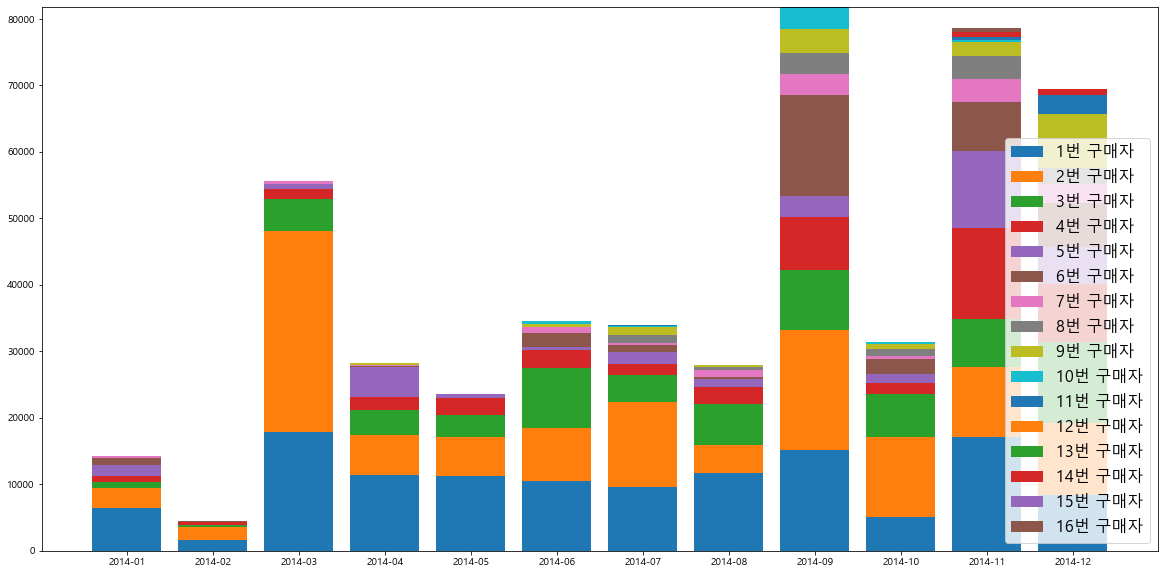

In [70]:
dff2014_2 = dff3.iloc[:,:12]
fig, ax = plt.subplots(figsize=(20,10))
width=0.35
ax.bar(dff2014_2.columns, dff2014_2.iloc[0,:],label='1번 구매자')
for i in range(1,16) :
    ax.bar(dff2014_2.columns, dff2014_2.iloc[i,:], bottom=dff2014_2.iloc[0:i,:].sum(axis=0), label=f'{i+1}번 구매자')
    
plt.legend()
plt.show()

## 2014년도 고객들의 데이터를 이용 -> 코호트차트 그리기

In [88]:
df['주문년도/월']

0       2016-11
1       2016-11
2       2016-06
3       2015-10
4       2015-10
         ...   
9989    2014-01
9990    2017-02
9991    2017-02
9992    2017-02
9993    2017-05
Name: 주문년도/월, Length: 9994, dtype: object

In [91]:
df['주문년도/월']=pd.to_datetime( df['주문년도/월'],format='%Y-%m') 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [94]:
df['주문년도/월'].dt.year

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: 주문년도/월, Length: 9994, dtype: int64

In [96]:
DF2014=df[df['주문년도/월'].dt.year==2014]
DF2014

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,랭크,주문년도/월
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,1.0,2014-06-01
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,2.0,2014-06-01
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,3.0,2014-06-01
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,4.0,2014-06-01
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,5.0,2014-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,9947,CA-2014-111157,2014-03-02,2014-03-06,Standard Class,NH-18610,Nicole Hansen,Corporate,United States,Philadelphia,...,TEC-AC-10004353,Technology,Accessories,Hypercom P1300 Pinpad,151.200,3,0.2,32.1300,2.0,2014-03-01
9956,9957,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-PA-10001776,Office Supplies,Paper,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",46.350,5,0.0,21.7845,4.0,2014-11-01
9957,9958,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-PA-10004039,Office Supplies,Paper,Xerox 1882,223.920,4,0.0,109.7208,5.0,2014-11-01
9958,9959,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-SU-10001574,Office Supplies,Supplies,Acme Value Line Scissors,7.300,2,0.0,2.1900,6.0,2014-11-01


In [103]:
DF2014_first = DF2014[DF2014['랭크']==1][['Customer ID','주문년도/월']]
DF2014_first

,Customer ID,주문년도/월
5,BH-11710,2014-06-01
16,PK-19075,2014-11-01
17,AG-10270,2014-05-01
18,ZD-21925,2014-08-01
113,RC-19960,2014-08-01
...,...,...
9911,RP-19855,2014-04-01
9921,AT-10435,2014-11-01
9933,JK-15205,2014-07-01
9945,NH-18610,2014-03-01


In [122]:
DF_2014 = pd.merge(DF2014, DF2014_first, on =['Customer ID'])
DF_2014.drop(DF_2014.iloc[:,0:5], axis=1, inplace=True)
DF_2014.drop(DF_2014.iloc[:,1:17], axis=1, inplace=True)
DF_2014

,Customer ID,주문년도/월_x,주문년도/월_y
0,BH-11710,2014-06-01,2014-06-01
1,BH-11710,2014-06-01,2014-06-01
2,BH-11710,2014-06-01,2014-06-01
3,BH-11710,2014-06-01,2014-06-01
4,BH-11710,2014-06-01,2014-06-01
...,...,...,...
1988,RE-19450,2014-06-01,2014-06-01
1989,RP-19855,2014-04-01,2014-04-01
1990,JK-15205,2014-07-01,2014-07-01
1991,NH-18610,2014-03-01,2014-03-01


In [123]:
DF_2014.head(10)

,Customer ID,주문년도/월_x,주문년도/월_y
0,BH-11710,2014-06-01,2014-06-01
1,BH-11710,2014-06-01,2014-06-01
2,BH-11710,2014-06-01,2014-06-01
3,BH-11710,2014-06-01,2014-06-01
4,BH-11710,2014-06-01,2014-06-01
5,BH-11710,2014-06-01,2014-06-01
6,BH-11710,2014-06-01,2014-06-01
7,BH-11710,2014-11-01,2014-06-01
8,BH-11710,2014-11-01,2014-06-01
9,PK-19075,2014-11-01,2014-11-01


In [124]:
grouped = DF_2014.groupby(['주문년도/월_y','주문년도/월_x'])

In [126]:
cohorts = grouped['Customer ID'].nunique()
cohorts.head()

주문년도/월_y    주문년도/월_x  
2014-01-01  2014-01-01    32
            2014-02-01     3
            2014-04-01     2
            2014-05-01     2
            2014-07-01     2
Name: Customer ID, dtype: int64

In [127]:
cohorts = cohorts.reset_index()
cohorts

,주문년도/월_y,주문년도/월_x,Customer ID
0,2014-01-01,2014-01-01,32
1,2014-01-01,2014-02-01,3
2,2014-01-01,2014-04-01,2
3,2014-01-01,2014-05-01,2
4,2014-01-01,2014-07-01,2
...,...,...,...
68,2014-10-01,2014-11-01,3
69,2014-10-01,2014-12-01,5
70,2014-11-01,2014-11-01,62
71,2014-11-01,2014-12-01,15


In [128]:
cohorts.rename({'Customer ID' : 'TotalUsers'}, axis=1, inplace=True)
cohorts.head()

,주문년도/월_y,주문년도/월_x,TotalUsers
0,2014-01-01,2014-01-01,32
1,2014-01-01,2014-02-01,3
2,2014-01-01,2014-04-01,2
3,2014-01-01,2014-05-01,2
4,2014-01-01,2014-07-01,2


In [129]:
each_period = cohorts['주문년도/월_y'].value_counts().sort_index()
each_period

2014-01-01    10
2014-02-01    10
2014-03-01     9
2014-04-01     9
2014-05-01     8
2014-06-01     7
2014-07-01     5
2014-08-01     5
2014-09-01     4
2014-10-01     3
2014-11-01     2
2014-12-01     1
Name: 주문년도/월_y, dtype: int64

In [130]:
cohorts[cohorts['주문년도/월_y']=='2014-01-01']

,주문년도/월_y,주문년도/월_x,TotalUsers
0,2014-01-01,2014-01-01,32
1,2014-01-01,2014-02-01,3
2,2014-01-01,2014-04-01,2
3,2014-01-01,2014-05-01,2
4,2014-01-01,2014-07-01,2
5,2014-01-01,2014-08-01,4
6,2014-01-01,2014-09-01,5
7,2014-01-01,2014-10-01,3
8,2014-01-01,2014-11-01,7
9,2014-01-01,2014-12-01,5


In [131]:
cohorts[cohorts['주문년도/월_y']=='2014-02-01']

,주문년도/월_y,주문년도/월_x,TotalUsers
10,2014-02-01,2014-02-01,24
11,2014-02-01,2014-03-01,4
12,2014-02-01,2014-04-01,2
13,2014-02-01,2014-05-01,1
14,2014-02-01,2014-07-01,2
15,2014-02-01,2014-08-01,2
16,2014-02-01,2014-09-01,3
17,2014-02-01,2014-10-01,3
18,2014-02-01,2014-11-01,4
19,2014-02-01,2014-12-01,4


In [132]:
cohorts[cohorts['주문년도/월_y']=='2014-03-01']

,주문년도/월_y,주문년도/월_x,TotalUsers
20,2014-03-01,2014-03-01,65
21,2014-03-01,2014-04-01,4
22,2014-03-01,2014-05-01,2
23,2014-03-01,2014-06-01,8
24,2014-03-01,2014-07-01,7
25,2014-03-01,2014-09-01,7
26,2014-03-01,2014-10-01,5
27,2014-03-01,2014-11-01,8
28,2014-03-01,2014-12-01,6


In [133]:
cohorts[cohorts['주문년도/월_y']=='2014-07-01']

,주문년도/월_y,주문년도/월_x,TotalUsers
53,2014-07-01,2014-07-01,44
54,2014-07-01,2014-08-01,6
55,2014-07-01,2014-09-01,5
56,2014-07-01,2014-11-01,5
57,2014-07-01,2014-12-01,8


In [134]:
# 전처리
cohorts.loc[cohorts.shape[0],'주문년도/월_y'] = '2014-01-01'
cohorts.loc[cohorts.shape[0]-1,'주문년도/월_x'] = '2014-03-01'
cohorts.loc[cohorts.shape[0]-1,'TotalUsers'] = 0

cohorts.loc[cohorts.shape[0],'주문년도/월_y'] = '2014-01-01'
cohorts.loc[cohorts.shape[0]-1,'주문년도/월_x'] = '2014-06-01'
cohorts.loc[cohorts.shape[0]-1,'TotalUsers'] = 0

cohorts.loc[cohorts.shape[0],'주문년도/월_y'] = '2014-02-01'
cohorts.loc[cohorts.shape[0]-1,'주문년도/월_x'] = '2014-06-01'
cohorts.loc[cohorts.shape[0]-1,'TotalUsers'] = 0

cohorts.loc[cohorts.shape[0],'주문년도/월_y'] = '2014-03-01'
cohorts.loc[cohorts.shape[0]-1,'주문년도/월_x'] = '2014-08-01'
cohorts.loc[cohorts.shape[0]-1,'TotalUsers'] = 0

cohorts.loc[cohorts.shape[0],'주문년도/월_y'] = '2014-07-01'
cohorts.loc[cohorts.shape[0]-1,'주문년도/월_x'] = '2014-10-01'
cohorts.loc[cohorts.shape[0]-1,'TotalUsers'] = 0

cohorts.sort_values(['주문년도/월_y','주문년도/월_x'], inplace=True)

In [143]:
cohorts['주문년도/월_y']=pd.to_datetime( cohorts['주문년도/월_y'],format='%Y-%m-%d') 

In [145]:
cohorts['주문년도/월_x']=pd.to_datetime( cohorts['주문년도/월_x'],format='%Y-%m-%d') 

In [146]:
each_period = cohorts['주문년도/월_y'].value_counts().sort_index()
each_period

2014-01-01    12
2014-02-01    11
2014-03-01    10
2014-04-01     9
2014-05-01     8
2014-06-01     7
2014-07-01     6
2014-08-01     5
2014-09-01     4
2014-10-01     3
2014-11-01     2
2014-12-01     1
Name: 주문년도/월_y, dtype: int64

In [148]:
cohortperiod = []

for x in each_period :
    for y in range(x) :
        cohortperiod.append(y)

In [149]:
cohorts['CohortPeriod'] = cohortperiod
cohorts.head(20)

,주문년도/월_y,주문년도/월_x,TotalUsers,CohortPeriod
0,2014-01-01,2014-01-01,32.0,0
1,2014-01-01,2014-02-01,3.0,1
73,2014-01-01,2014-03-01,0.0,2
2,2014-01-01,2014-04-01,2.0,3
3,2014-01-01,2014-05-01,2.0,4
74,2014-01-01,2014-06-01,0.0,5
4,2014-01-01,2014-07-01,2.0,6
5,2014-01-01,2014-08-01,4.0,7
6,2014-01-01,2014-09-01,5.0,8
7,2014-01-01,2014-10-01,3.0,9


In [150]:
cohorts.set_index(['주문년도/월_y','CohortPeriod'], inplace=True)
cohorts.head()

주문년도/월_x  TotalUsers
주문년도/월_y   CohortPeriod                       
2014-01-01 0            2014-01-01        32.0
           1            2014-02-01         3.0
           2            2014-03-01         0.0
           3            2014-04-01         2.0
           4            2014-05-01         2.0

In [151]:
cohorts = cohorts['TotalUsers'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11
주문년도/월_y,,,,,,,,,,,,
2014-01-01,32.0,3.0,0.0,2.0,2.0,0.0,2.0,4.0,5.0,3.0,7.0,5.0
2014-02-01,24.0,4.0,2.0,1.0,0.0,2.0,2.0,3.0,3.0,4.0,4.0,NaN
2014-03-01,65.0,4.0,2.0,8.0,7.0,0.0,7.0,5.0,8.0,6.0,NaN,NaN
2014-04-01,56.0,6.0,2.0,4.0,3.0,8.0,6.0,9.0,8.0,NaN,NaN,NaN
2014-05-01,56.0,5.0,5.0,4.0,10.0,2.0,12.0,10.0,NaN,NaN,NaN,NaN
2014-06-01,48.0,1.0,2.0,4.0,2.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,44.0,6.0,5.0,0.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,49.0,8.0,3.0,11.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,68.0,9.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
user_retention = cohorts.div(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11
주문년도/월_y,,,,,,,,,,,,
2014-01-01,1.0,0.093750,0.000000,0.062500,0.062500,0.000000,0.062500,0.125000,0.156250,0.093750,0.218750,0.15625
2014-02-01,1.0,0.166667,0.083333,0.041667,0.000000,0.083333,0.083333,0.125000,0.125000,0.166667,0.166667,NaN
2014-03-01,1.0,0.061538,0.030769,0.123077,0.107692,0.000000,0.107692,0.076923,0.123077,0.092308,NaN,NaN
2014-04-01,1.0,0.107143,0.035714,0.071429,0.053571,0.142857,0.107143,0.160714,0.142857,NaN,NaN,NaN
2014-05-01,1.0,0.089286,0.089286,0.071429,0.178571,0.035714,0.214286,0.178571,NaN,NaN,NaN,NaN
2014-06-01,1.0,0.020833,0.041667,0.083333,0.041667,0.187500,0.166667,NaN,NaN,NaN,NaN,NaN
2014-07-01,1.0,0.136364,0.113636,0.000000,0.113636,0.181818,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,1.0,0.163265,0.061224,0.224490,0.102041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,1.0,0.132353,0.132353,0.161765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


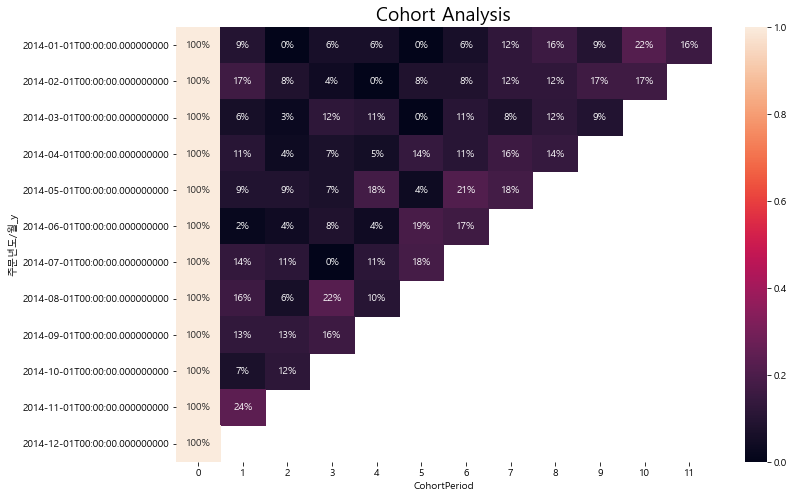

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

In [101]:
DF2014_1 = DF2014[DF2014['랭크']==1].groupby(['주문년도/월']).count()['랭크'].to_frame()
DF2014_1.columns = ['처음구매자수']
DF2014_1

,처음구매자수
주문년도/월,
2014-01-01,32
2014-02-01,24
2014-03-01,65
2014-04-01,56
2014-05-01,56
2014-06-01,48
2014-07-01,44
2014-08-01,49
2014-09-01,68


In [102]:
DF2014_1['두번째'] = np.nan
DF2014_1

,처음구매자수,두번째
주문년도/월,,
2014-01-01,32,NaN
2014-02-01,24,NaN
2014-03-01,65,NaN
2014-04-01,56,NaN
2014-05-01,56,NaN
2014-06-01,48,NaN
2014-07-01,44,NaN
2014-08-01,49,NaN
2014-09-01,68,NaN


In [27]:
df_first = df[df['랭크']==1][['Customer ID','주문년도/월']]
df_first

,Customer ID,주문년도/월
2,DV-13045,2016-06
3,SO-20335,2015-10
5,BH-11710,2014-06
16,PK-19075,2014-11
17,AG-10270,2014-05
...,...,...
9933,JK-15205,2014-07
9944,RD-19660,2015-04
9945,NH-18610,2014-03
9961,CM-12655,2015-03


In [28]:
df_user_rank = pd.merge(df,df_first, on=['Customer ID'], suffixes=['주문년월','첫구매날짜'])

In [29]:
df_user_rank

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,랭크,주문년도/월주문년월,주문년도/월첫구매날짜
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,3.0,2016-11,2015-10
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,4.0,2016-11,2015-10
2,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160,5.0,2017-01,2015-10
3,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476,1.0,2015-10,2015-10
4,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Office Supplies,Paper,Xerox 1986,5.344,1,0.2,1.8704,2.0,2015-10,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9560,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,Office Supplies,Storage,Tennsco Industrial Shelving,195.640,5,0.2,-44.0190,2.0,2016-05,2016-05
9990,9561,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,Furniture,Furnishings,"Computer Room Manger, 14""",51.968,2,0.2,10.3936,3.0,2016-05,2016-05
9991,9562,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,Technology,Accessories,Logitech VX Revolution Cordless Laser Mouse fo...,431.976,3,0.2,-75.5958,4.0,2016-05,2016-05
9992,9563,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,Technology,Machines,Cisco 8961 IP Phone Charcoal,224.937,3,0.7,-164.9538,5.0,2016-05,2016-05
